# Analýza spokojenosti zákazníků letecké společnosti

### ESF MUNI, Datamining, jarní semestr 2023

In [ ]:
Analýza spokojenosti zákazníku aerolinky

Cílem tohoto projektu je provést datovou analýzu průzkumu provedeného 
mezi zákazníky letecké společnosti. Analýza poskytne důležité informace
a poznatky pro management společnosti, které jim pomohou lépe porozumět zákazníkům,
jejich potřebám a preferencím. Na základě těchto poznatků bude možné
přijmout strategická rozhodnutí a zlepšit kvalitu poskytovaných služeb, 
což přinese byznysový přínos v podobě zvýšené spokojenosti zákazníků a jejich loajality.

Provést průzkumnou faktorovou analýzu, pochopit, 
které faktory spokojenosti zákazníků se sdružují do skupin.

Které faktory ovlivňují spokojenost nejvíce? K tomu využijeme lineární regresi.

Prozkoumat významné proměnné a vizualizovat je.

In [ ]:
Jaka jsou omezení datasetu?

1. Neznáme ceny letenek
2. Spokojenost je definována velmi úzce dvěmi hodnotami, chtělo by to škálu 1 až 5, 
kterou by šlo získat leda zprůměrováním odpovědí v jednotlivých kategoriích
3. V první časti se podívame na obsah datasetu (popisná statistika a explorativní analýza). 

In [16]:
# Načtení průzkumu z .xlsx formátu.

library(readxl)
f <- read_excel("satisfaction.xlsx")

In [173]:
# Názvy sloupců jsou v angličtině

colnames(f)

[1] "id"                                "satisfaction_v2"                  
 [3] "Gender"                            "Customer Type"                    
 [5] "Age"                               "Type of Travel"                   
 [7] "Class"                             "Flight Distance"                  
 [9] "Seat comfort"                      "Departure/Arrival time convenient"
[11] "Food and drink"                    "Gate location"                    
[13] "Inflight wifi service"             "Inflight entertainment"           
[15] "Online support"                    "Ease of Online booking"           
[17] "On-board service"                  "Leg room service"                 
[19] "Baggage handling"                  "Checkin service"                  
[21] "Cleanliness"                       "Online boarding"                  
[23] "Departure Delay in Minutes"        "Arrival Delay in Minutes"

In [17]:
# Změníme je raději na české

colnames(f) <- c("id", "spokojenost", "pohlavi", "typ_zakaznika", "vek", "typ_cestovani", "trida", "vzdalenost_letu", "komfort_sedadla",
                 "cas_odlet_prilet_pohodlnost", "jidlo_a_piti", "poloha_gate", "wifi_na_palube", "zabava_na_palube", "online_podpora",
                 "snadnost_online_rezervace", "sluzby_na_palube", "sluzby_pro_prostor_na_nohy", "manipulace_s_batohem",
                 "checkin_sluzba", "cistota", "online_nastup", "zpozdeni_odletu_v_minutach", "zpozdeni_priletu_v_minutach")

In [156]:
# Kontrola

colnames(f)
length(colnames(f))

[1] "id"                              "spokojenost"                    
 [3] "pohlavi"                         "typ_zakaznika"                  
 [5] "vek"                             "typ_cestovani"                  
 [7] "trida"                           "vzdalenost_letu"                
 [9] "wifi_na_palube"                  "pohodli_pri_case_odlotu_priletu"
[11] "snadnost_online_rezervace"       "poloha_gate"                    
[13] "jidlo_a_piti"                    "online_nastup"                  
[15] "komfort_sedadla"                 "zabava_na_palube"               
[17] "sluzby_na_palube"                "sluzby_pro_prostor_na_nohy"     
[19] "manipulace_s_batohem"            "checkin_sluzba"                 
[21] "sluzby_na_palube"                "cistota"                        
[23] "zpozdeni_odlotu_v_minutach"      "zpozdeni_priletu_v_minutach"

In [125]:
# Rozměry souboru

dim(f)

[1] 129880     24

In [18]:
# Zkontrolujeme, zda se v datasetu vyskytují chybějící hodnoty

sum(is.na(f))

# Čištění, zbavme se prázdných hodnot
f <- na.omit(f)

# Zkontrolujeme
sum(is.na(df))

[1] 393

Warning message in is.na(df):
"is.na() applied to non-(list or vector) of type 'closure'"


[1] 0

In [183]:
# Začněme seznámením s obsahem sloupců
head(f, 3)

id,spokojenost,pohlavi,typ_zakaznika,vek,typ_cestovani,trida,vzdalenost_letu,komfort_sedadla,cas_odlet_prilet_pohodlnost,...,online_podpora,snadnost_online_rezervace,sluzby_na_palube,sluzby_pro_prostor_na_nohy,manipulace_s_batohem,checkin_sluzba,cistota,online_nastup,zpozdeni_odletu_v_minutach,zpozdeni_priletu_v_minutach
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0
110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305
103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0


In [100]:
# Popisná statistika
summary(f)

       id          spokojenost         pohlavi          typ_zakaznika     
 Min.   :     1   Min.   :-1.00000   Length:129487      Length:129487     
 1st Qu.: 32495   1st Qu.:-1.00000   Class :character   Class :character  
 Median : 64972   Median : 1.00000   Mode  :character   Mode  :character  
 Mean   : 64958   Mean   : 0.09481                                        
 3rd Qu.: 97416   3rd Qu.: 1.00000                                        
 Max.   :129880   Max.   : 1.00000                                        
      vek        typ_cestovani         trida           vzdalenost_letu
 Min.   : 7.00   Length:129487      Length:129487      Min.   :  50   
 1st Qu.:27.00   Class :character   Class :character   1st Qu.:1359   
 Median :40.00   Mode  :character   Mode  :character   Median :1924   
 Mean   :39.43                                         Mean   :1981   
 3rd Qu.:51.00                                         3rd Qu.:2543   
 Max.   :85.00                                   

In [101]:
library(skimr)

# Níže vidíme datové třídy pro jednotlivé sloupce
skim(f)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,factor.ordered,factor.n_unique,factor.top_counts,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,pohlavi,0,1,4,6,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,typ_zakaznika,0,1,14,17,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,typ_cestovani,0,1,15,15,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,character,trida,0,1,3,8,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,factor,komfort_sedadla,0,1,NA,NA,NA,NA,NA,FALSE,6,"3: 29096, 2: 28645, 4: 28315, 1: 20882",NA,NA,NA,NA,NA,NA,NA,NA
6,factor,cas_odlet_prilet_pohodlnost,0,1,NA,NA,NA,NA,NA,FALSE,6,"4: 29504, 5: 26723, 3: 23110, 2: 22735",NA,NA,NA,NA,NA,NA,NA,NA
7,factor,jidlo_a_piti,0,1,NA,NA,NA,NA,NA,FALSE,6,"3: 28065, 4: 27129, 2: 27078, 1: 21008",NA,NA,NA,NA,NA,NA,NA,NA
8,factor,poloha_gate,0,1,NA,NA,NA,NA,NA,FALSE,6,"3: 33451, 4: 29997, 2: 24441, 1: 22497",NA,NA,NA,NA,NA,NA,NA,NA
9,factor,wifi_na_palube,0,1,NA,NA,NA,NA,NA,FALSE,6,"4: 31474, 5: 28738, 3: 27518, 2: 26957",NA,NA,NA,NA,NA,NA,NA,NA


-- Data Summary ------------------------
                           Values
Name                       f     
Number of rows             129487
Number of columns          24    
_______________________          
Column type frequency:           
  factor                   14    
  character                4     
  numeric                  6     
________________________         
Group variables            None  

-- Variable type: factor -------------------------------------------------------
   skim_variable               n_missing complete_rate ordered n_unique
 1 komfort_sedadla                     0             1 FALSE          6
 2 cas_odlet_prilet_pohodlnost         0             1 FALSE          6
 3 jidlo_a_piti                        0             1 FALSE          6
 4 poloha_gate                         0             1 FALSE          6
 5 wifi_na_palube                      0             1 FALSE          6
 6 zabava_na_palube                    0             1 FALSE          6

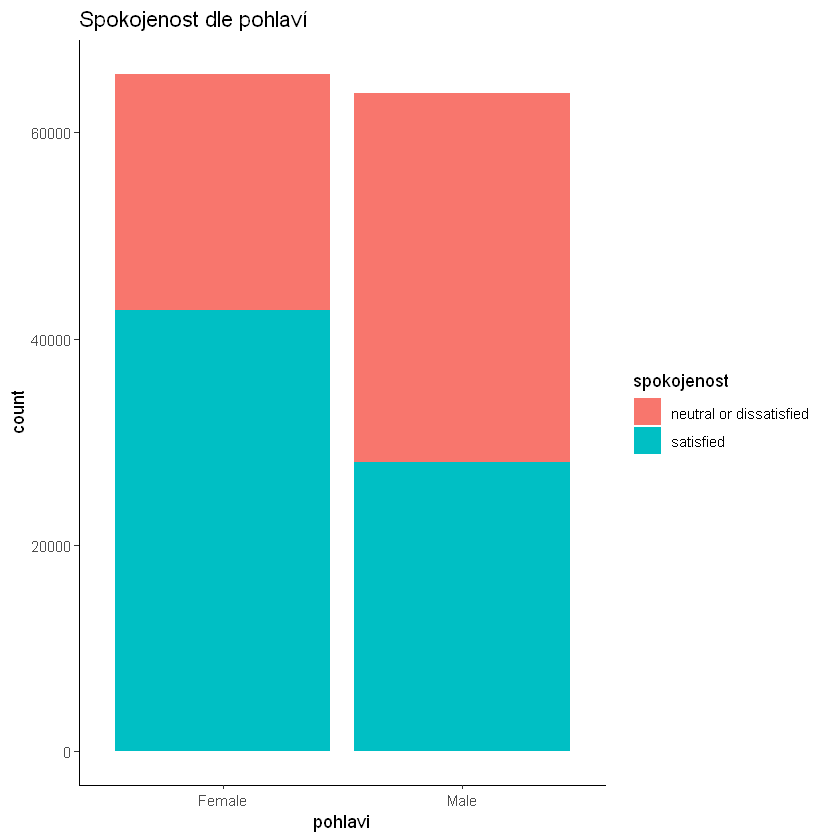

In [57]:

gender_statis_bar <- ggplot(f, aes(x=pohlavi, fill=spokojenost)) +
  geom_bar() +
  theme_classic() +
  labs(title = "Spokojenost dle pohlaví")


gender_statis_bar

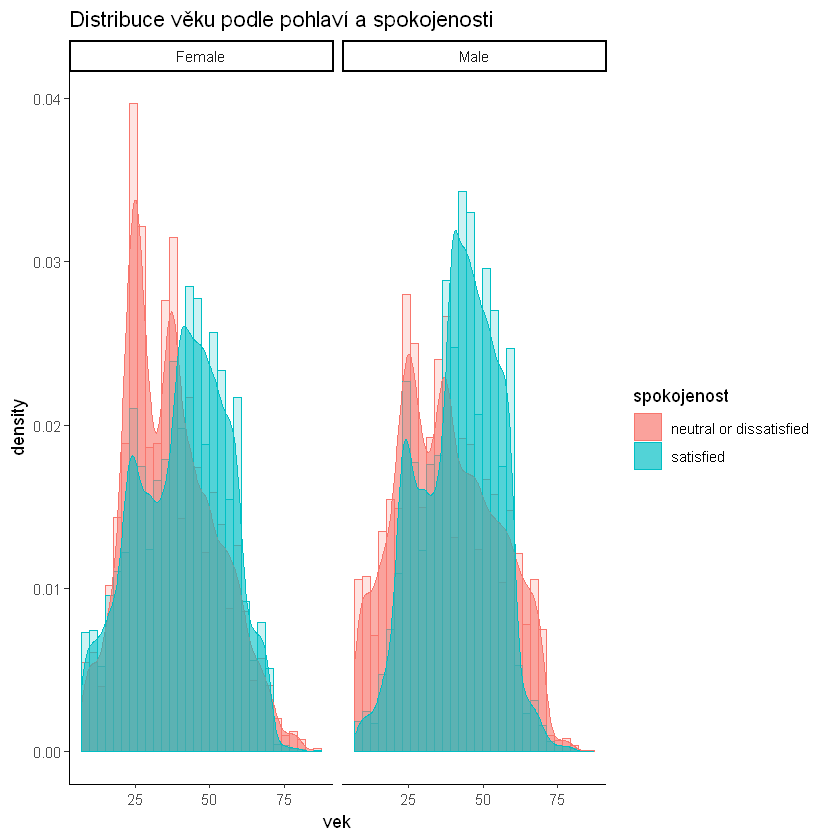

In [65]:
# Muži a ženy představují v celkovém souboru údajů téměř stejný podíl. 
# Vidíme, že nespokojených zákazníků mužského pohlaví je více než žen.

vek_hist <- ggplot(f, aes(x=vek, fill=spokojenost, color=spokojenost)) +
  geom_histogram(aes(y=after_stat(density)), position="identity", alpha=0.2, bins=30)+ 
  geom_density(alpha=0.6)+
  labs(title="Distribuce věku podle pohlaví a spokojenosti") +
  theme_classic() +
  facet_grid(~pohlavi)

vek_hist

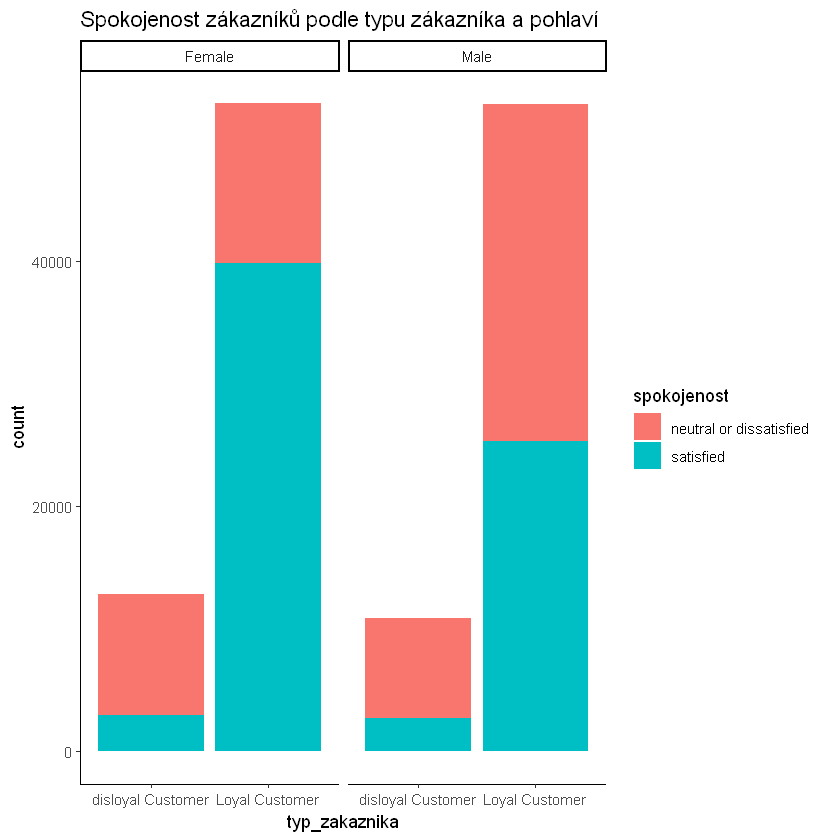

In [185]:


gender_statis_type_bar <- ggplot(f, aes(x=typ_zakaznika, fill=spokojenost)) +
      geom_bar() +
      theme_classic() +
      labs(title = "Spokojenost zákazníků podle typu zákazníka a pohlaví") +
      facet_grid(~pohlavi)
    
print(gender_statis_type_bar)

In [ ]:
Nejvíce nespokojených zákazníků je ve věku 25 a 35 let. 
Dalo by se říci, že nejvíce nespokojených zákazníků je ve věku 18 až 40 let. 
Ženy mají vyšší vrcholy ve srovnání s muži, ale ve věku od 45 do 70 let 
je více nespokojených mužů.

Jak můžeme vidět na grafu spokojených vpravo, zákazníci dosahují vrcholu kolem 40 let. 
Předtím je pouze jeden mírný vrchol ve věku 25 let. Z toho bychom mohli říci, že mezi ženami
je více nespokojených v mladším věku, zatímco muži jsou více rozděleni, speciálně ve vyšším věku.

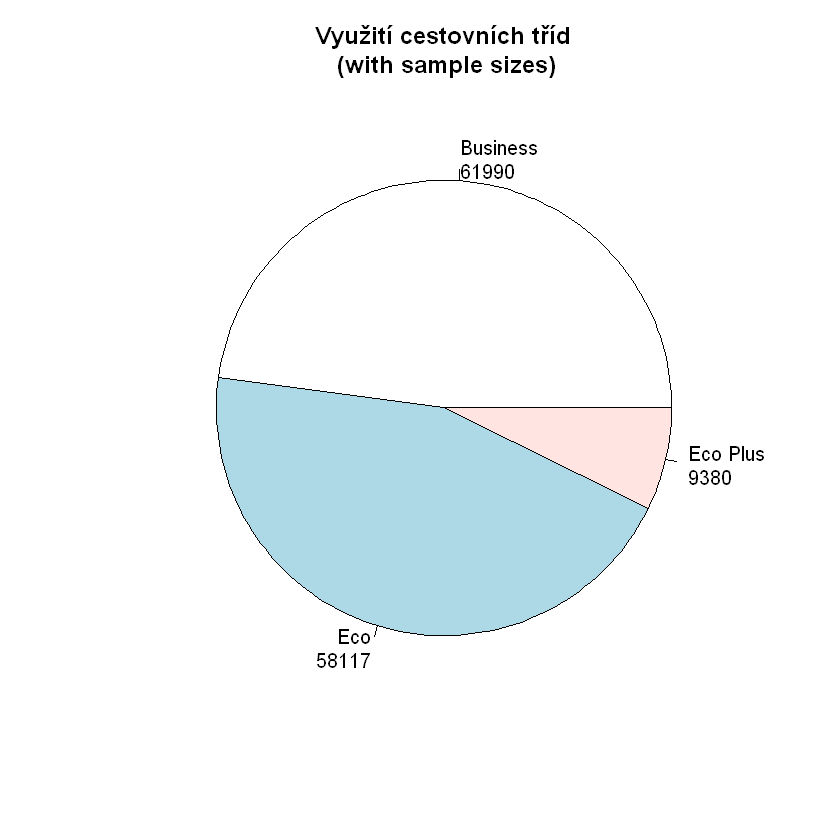

In [187]:
# Koláčový graf zobrazující zastoupení zakoupené třídy mezi dotazovanými

tab <- table(f$trida)
kol <- paste(names(tab), "\n", tab, sep="")
pie(tab, labels = kol,
    main="Využití cestovních tříd\n (with sample sizes)")

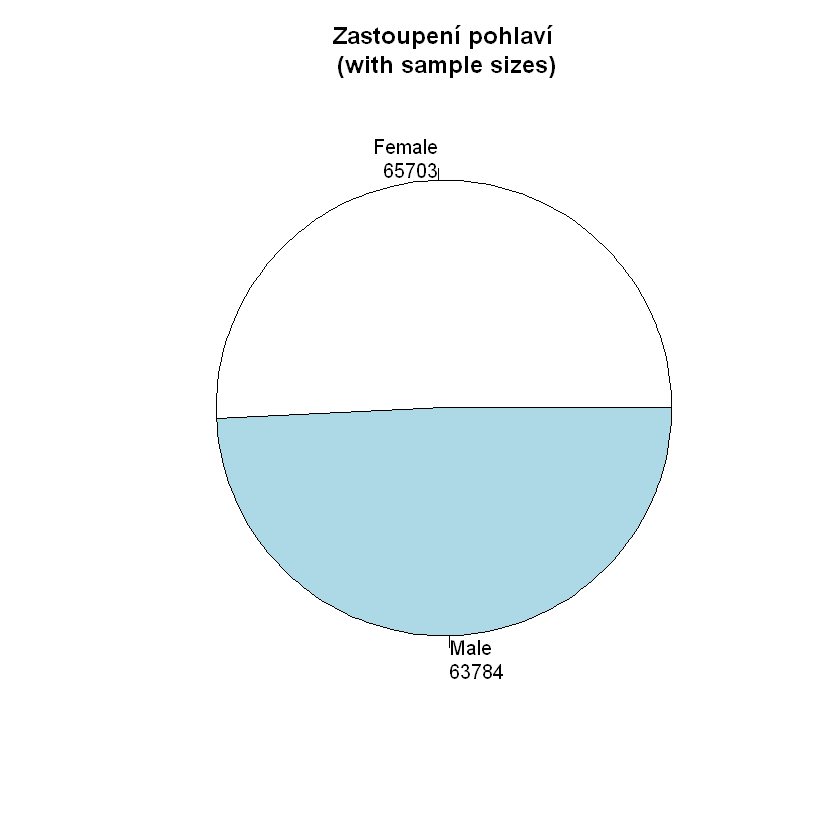

In [188]:
# Koláčový graf zobrazující zastoupení zakoupené třídy mezi dotazovanými

tab <- table(f$pohlavi)
kol <- paste(names(tab), "\n", tab, sep="")
pie(tab, labels = kol,
    main="Zastoupení pohlaví\n (with sample sizes)") 

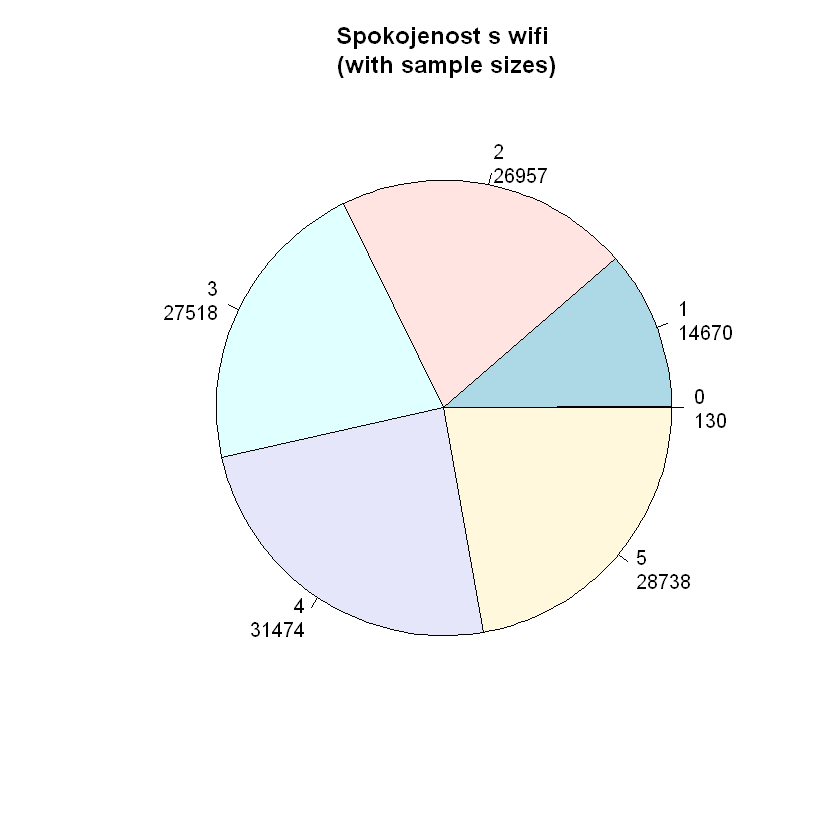

In [191]:
tab <- table(f$wifi_na_palube)
kol <- paste(names(tab), "\n", tab, sep="")
pie(tab, labels = kol,
    main="Spokojenost s wifi\n (with sample sizes)") 

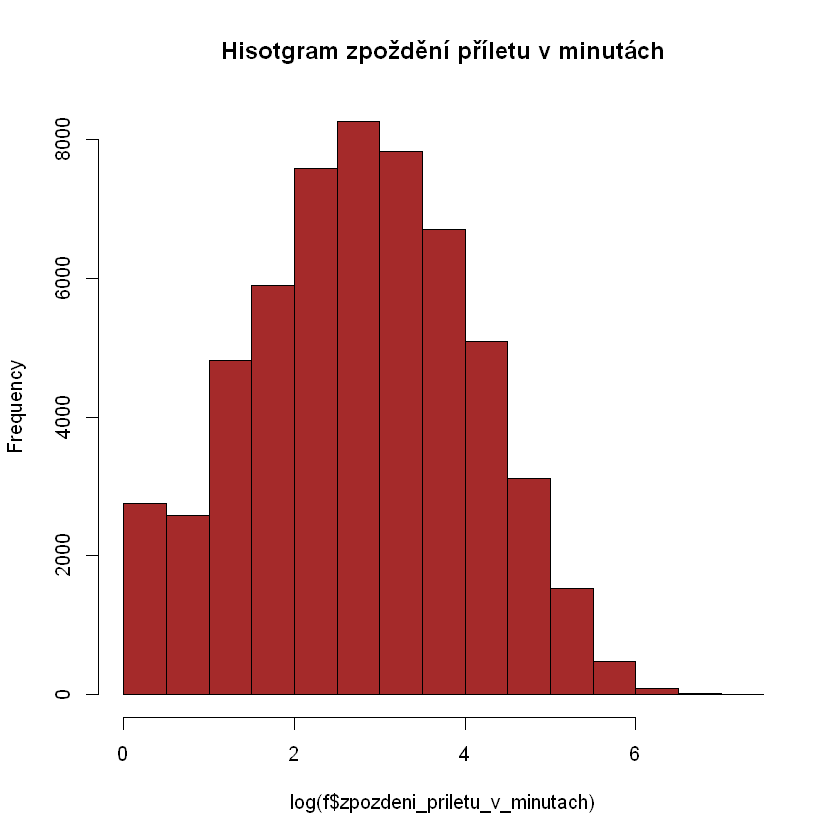

In [194]:
# Nejčastější zpoždění pozorujeme mezi dvěmi až čtyřmi minutami

hist(log(f$zpozdeni_priletu_v_minutach), col="brown", main = "Hisotgram zpoždění příletu v minutách")
# Pro vykreslení je použit histogram s logaritmickou škálou

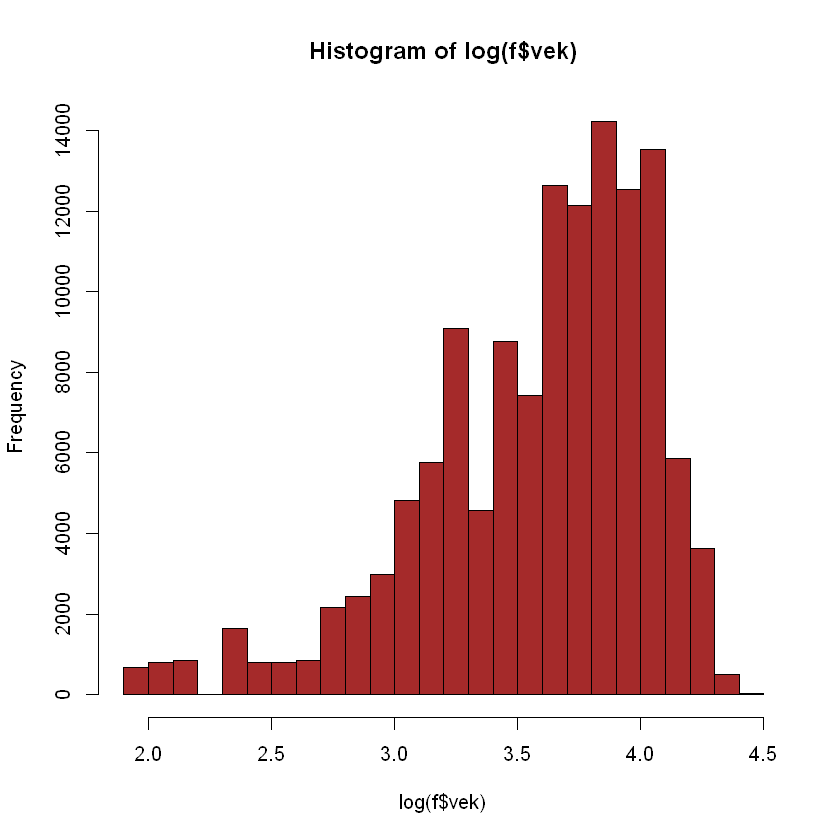

In [205]:
# Nejčastější zpoždění pozorujeme mezi dvěmi až čtyřmi minutami

hist(log(f$vek), col="brown")
# Pro vykreslení je použit histogram s 

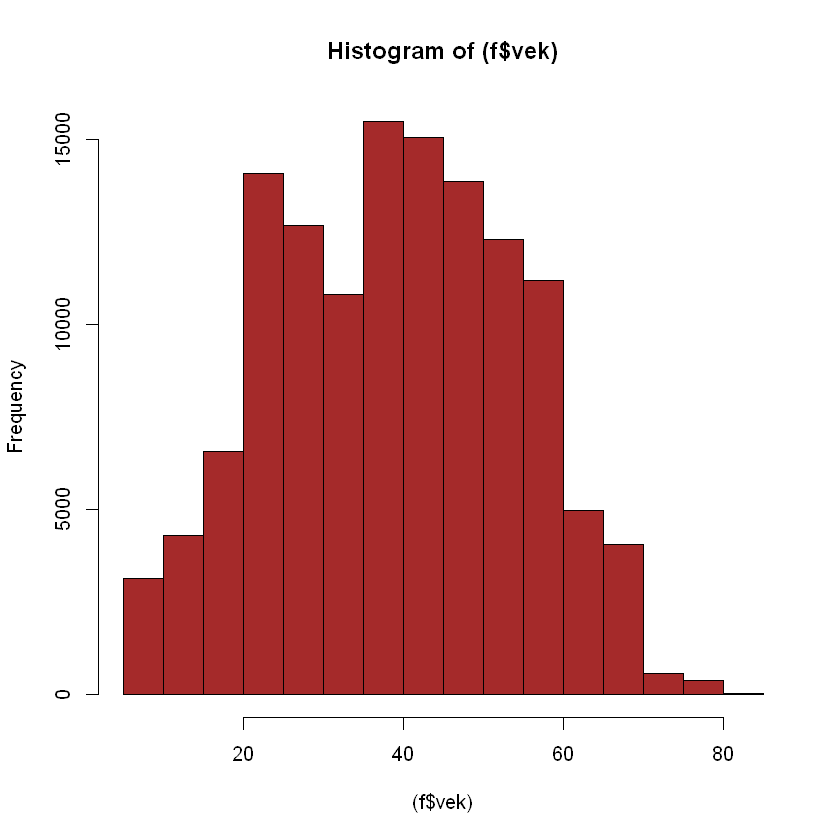

In [198]:
hist((f$vek), col="brown")


   -1     1 
58605 70882 

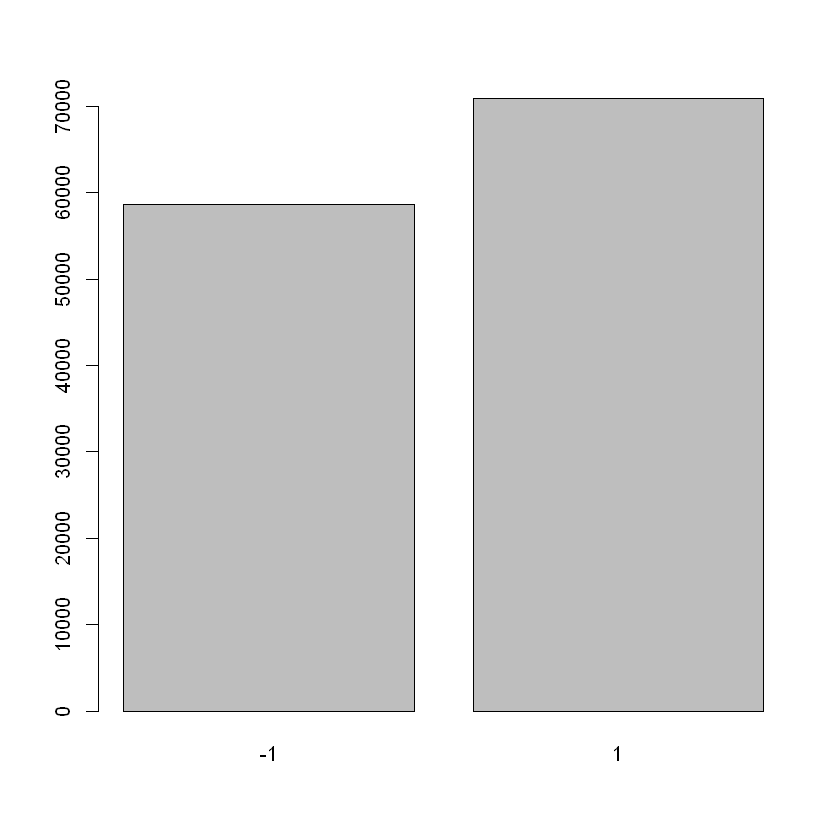

In [98]:
# Zobrazení proměnné s třídou character (pomocí table)

tabledata <- table(f$spokojenost)

barplot(tabledata)
table(f$spokojenost)

In [5]:
# Musim zprovoznit korelacni matrix, bere jen numericke hodnoty, takze vybrat jen numericke sloupce

library(ggcorrplot)
library(ggplot2)

ggcorrplot(f, hc.order = T, type = "lower",
           outline.col = "white",
           ggtheme = ggplot2::theme_gray,
           colors = c("#6D9EC1", "white", "#E46726"))
http://www.sthda.com/english/wiki/ggcorrplot-visualization-of-a-correlation-matrix-using-ggplot2


ERROR: Error in parse(text = x, srcfile = src): <text>:10:6: unexpected '/'
9:            colors = c("#6D9EC1", "white", "#E46726"))
10: http:/
         ^


In [ ]:
Random forest?

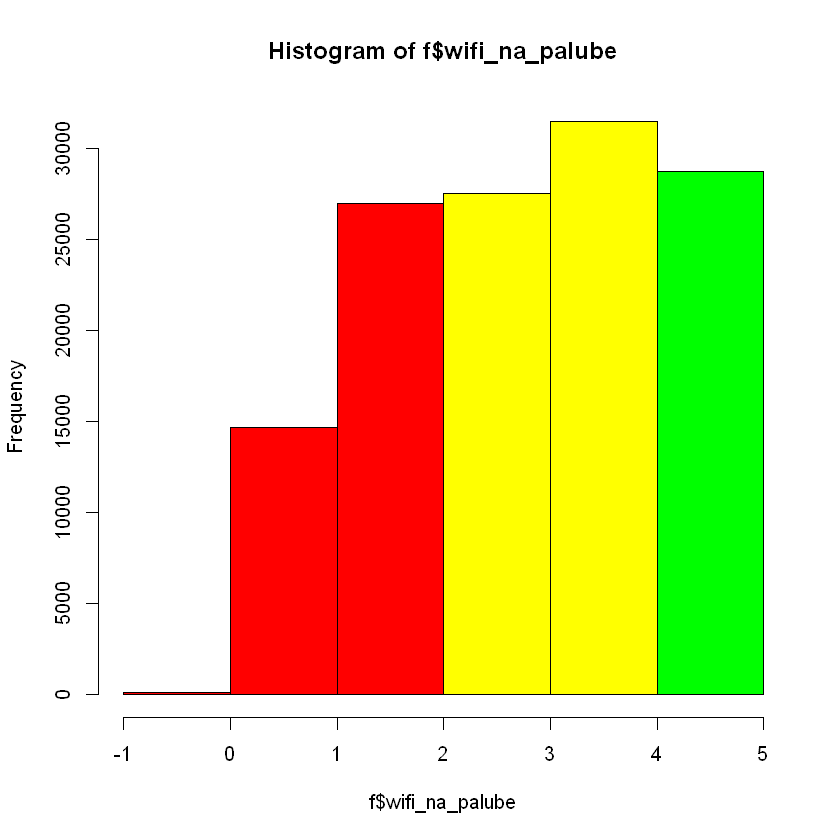

In [199]:
# Net Promoter Score
# První pokus přes histogram

hist(f$wifi_na_palube, breaks=-1:5, col=c(rep("red",3), rep("yellow",2), rep("green", 1)))

In [184]:
colnames(f)

[1] "id"                          "spokojenost"                
 [3] "pohlavi"                     "typ_zakaznika"              
 [5] "vek"                         "typ_cestovani"              
 [7] "trida"                       "vzdalenost_letu"            
 [9] "komfort_sedadla"             "cas_odlet_prilet_pohodlnost"
[11] "jidlo_a_piti"                "poloha_gate"                
[13] "wifi_na_palube"              "zabava_na_palube"           
[15] "online_podpora"              "snadnost_online_rezervace"  
[17] "sluzby_na_palube"            "sluzby_pro_prostor_na_nohy" 
[19] "manipulace_s_batohem"        "checkin_sluzba"             
[21] "cistota"                     "online_nastup"              
[23] "zpozdeni_odletu_v_minutach"  "zpozdeni_priletu_v_minutach"

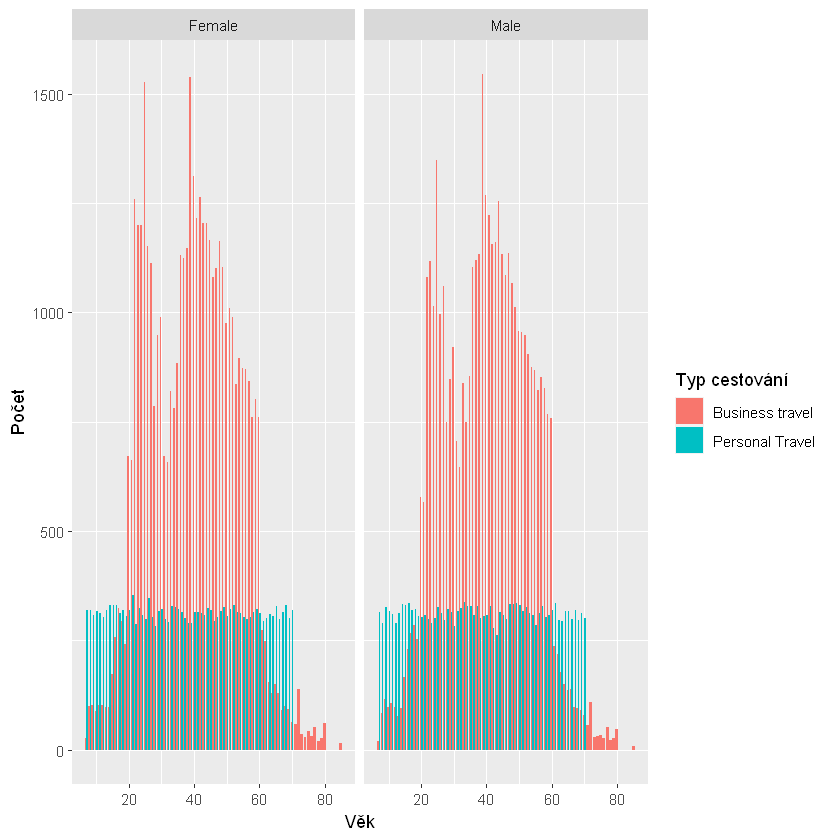

In [209]:
# Pracovní cesty jsou celkem 

ggplot(f, aes(x = vek, fill = typ_cestovani)) +
  geom_bar(position = "dodge") +
  facet_grid(. ~ pohlavi) +
  labs(x = "Věk", y = "Počet", fill = "Typ cestování")

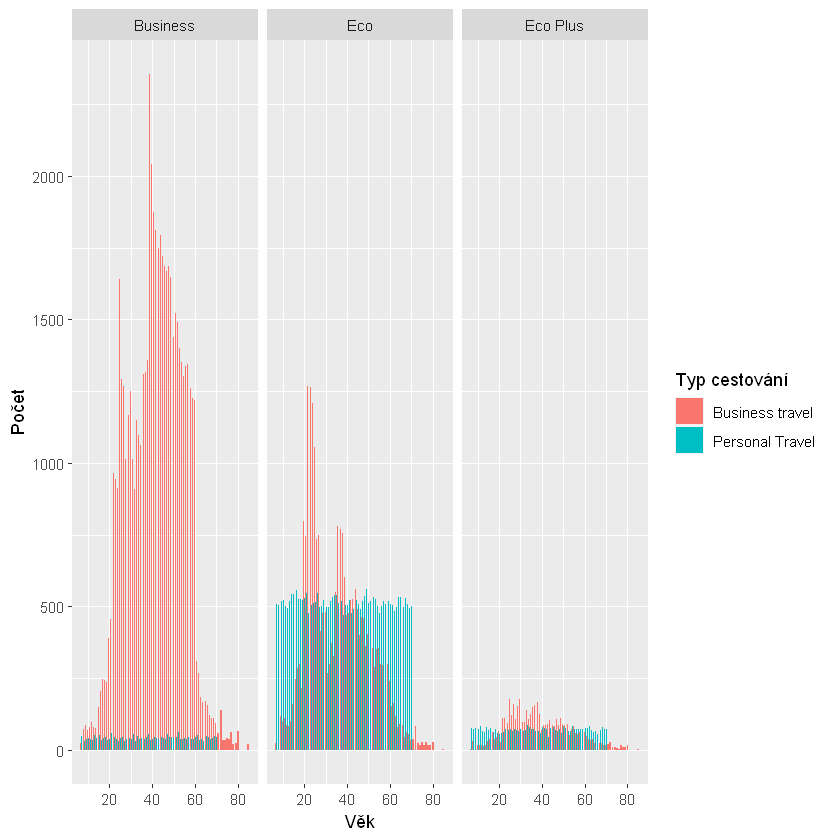

In [203]:
# 

ggplot(f, aes(x = vek, fill = typ_cestovani)) +
  geom_bar(position = "dodge") +
  facet_grid(. ~ trida) +
  labs(x = "Věk", y = "Počet", fill = "Typ cestování")

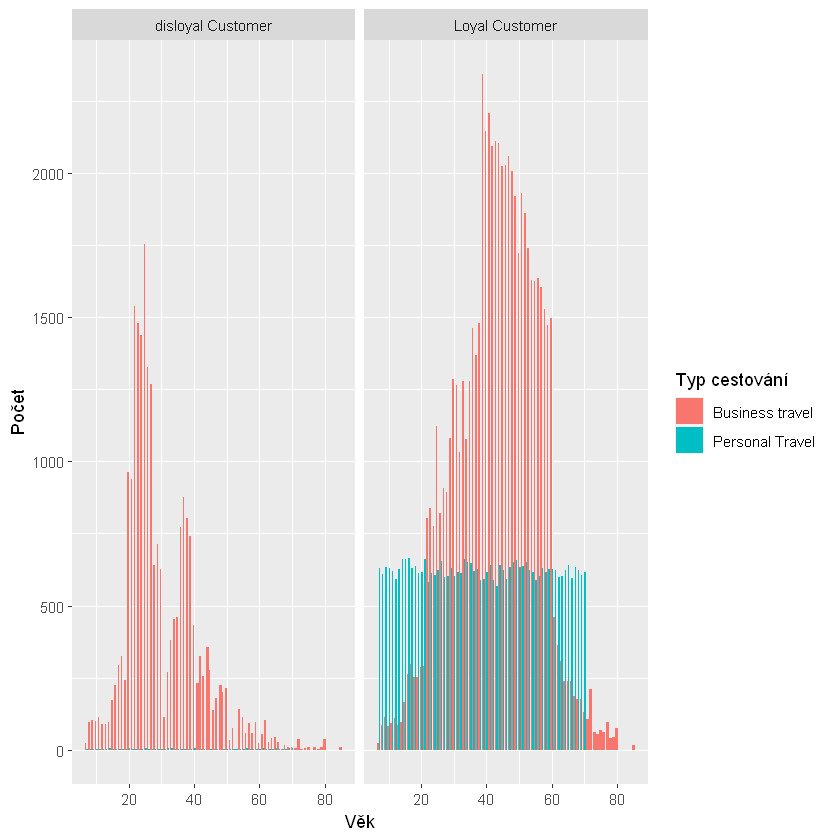

In [19]:
ggplot(f, aes(x = vek, fill = typ_cestovani)) +
  geom_bar(position = "dodge") +
  facet_grid(. ~ typ_zakaznika) +
  labs(x = "Věk", y = "Počet", fill = "Typ cestování")

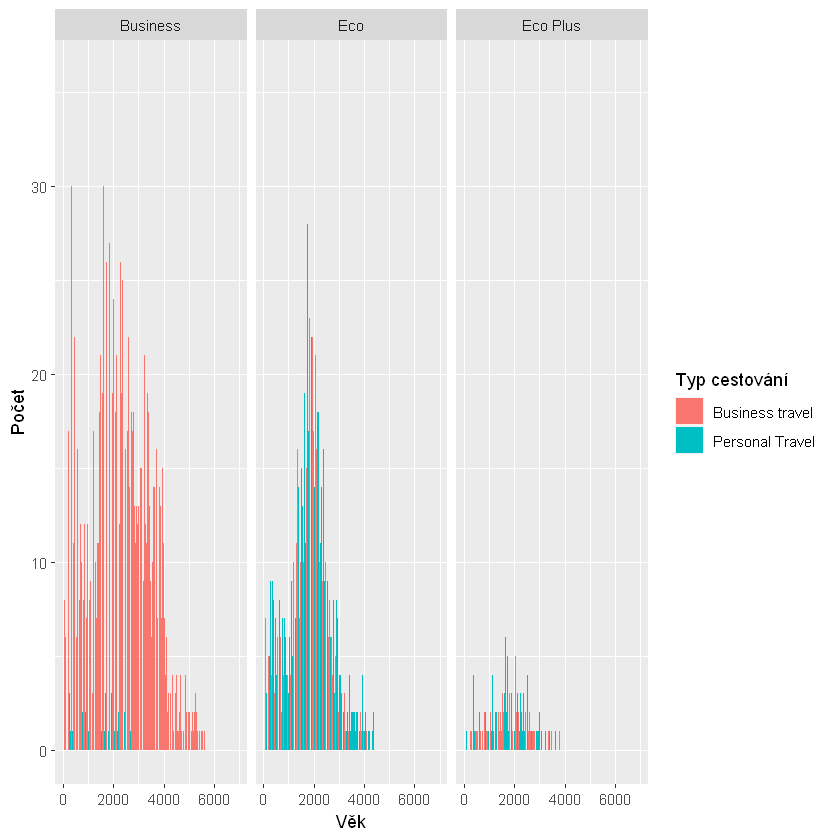

In [20]:

library(ggplot2)

ggplot(f, aes(x = vzdalenost_letu, fill = typ_cestovani)) +
  geom_bar(position = "dodge") +
  facet_grid(. ~ trida) +
  labs(x = "Věk", y = "Počet", fill = "Typ cestování")

In [ ]:
Respondenti, kteří zvolili možnost 0-1 (0, při stupnici 0-5), se nazývají propagátoři. 
Lidé, kteří zvolili hodnoty 2-3 (2, pro škálu 0-5), se nazývají Pasivisté, 
hodnoty nad 3 (nad 2, pro škálu 0-5) se nazývají Odpůrci. 
Čím vyšší je hodnota NPS, tím služba lepší. Obecně se předpokládá, 
že hodnota kolem 70 % NPS je velmi dobré skóre.

In [27]:
table(f$wifi_na_palube)


    0     1     2     3     4     5 
  130 14670 26957 27518 31474 28738 

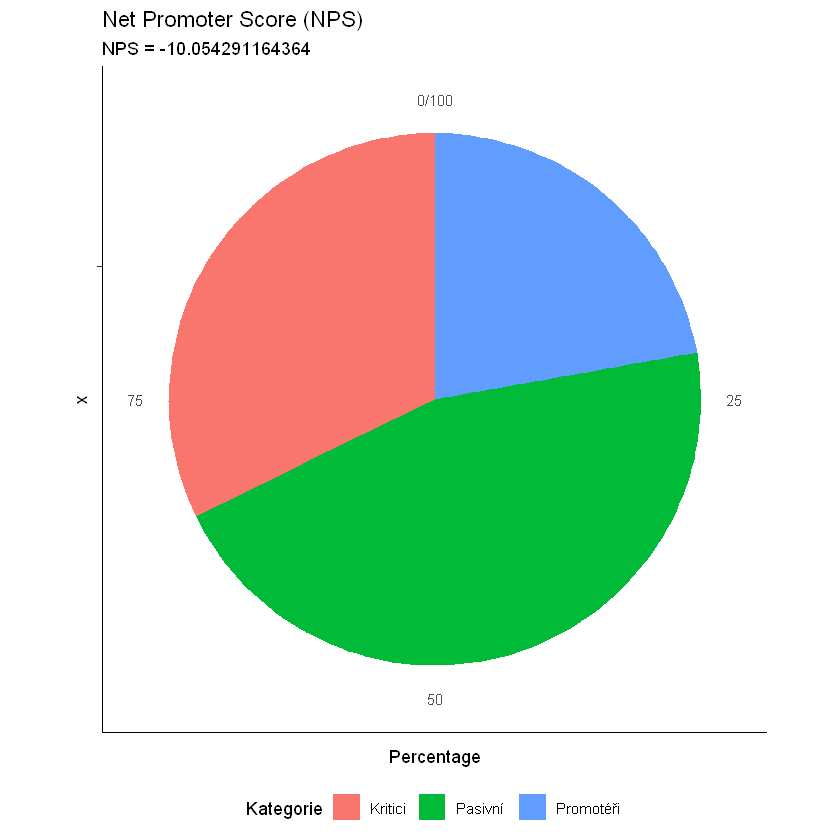

In [208]:
o <- f$wifi_na_palube

# Výpočet procenta promotérů, pasivních a kritiků
promoters <- sum(o >= 5) / length(o) * 100
passives <- sum(o >= 3 & o <= 4) / length(o) * 100
detractors <- sum(o <= 2) / length(o) * 100

# Výpočet Net Promoter Score (NPS)
nps <- promoters - detractors

# Vytvoření datového rámce pro graf
nps_data <- data.frame(Category = c("Promotéři", "Pasivní", "Kritici"),
                       Percentage = c(promoters, passives, detractors))

# Vykreslení grafu pomocí ggplot2
ggplot(nps_data, aes(x = "", y = Percentage, fill = Category)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  theme_classic() +
  theme(legend.position = "bottom") +
  labs(title = "Net Promoter Score (NPS)",
       subtitle = paste0("NPS = ", nps),
       fill = "Kategorie")

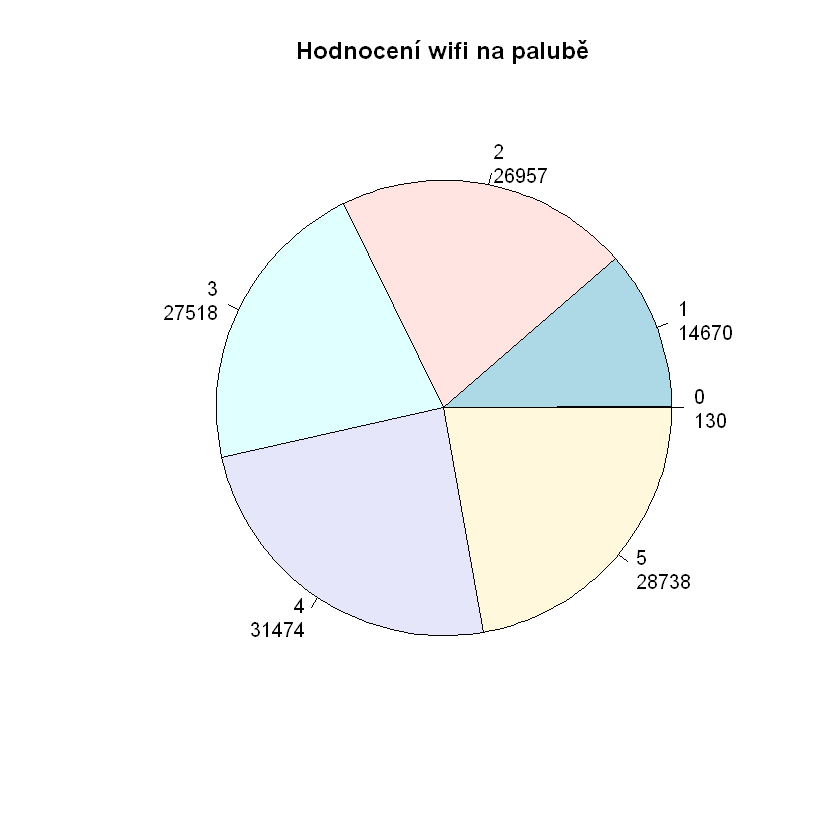

In [29]:
# 

tab <- table(f$wifi_na_palube)
kol <- paste(names(tab), "\n", tab, sep="")
pie(tab, labels = kol,
    main="Hodnocení wifi na palubě") 

Warning message in brewer.pal(length(unique(f$spokojenost)), "Set1"):
"minimal value for n is 3, returning requested palette with 3 different levels
"


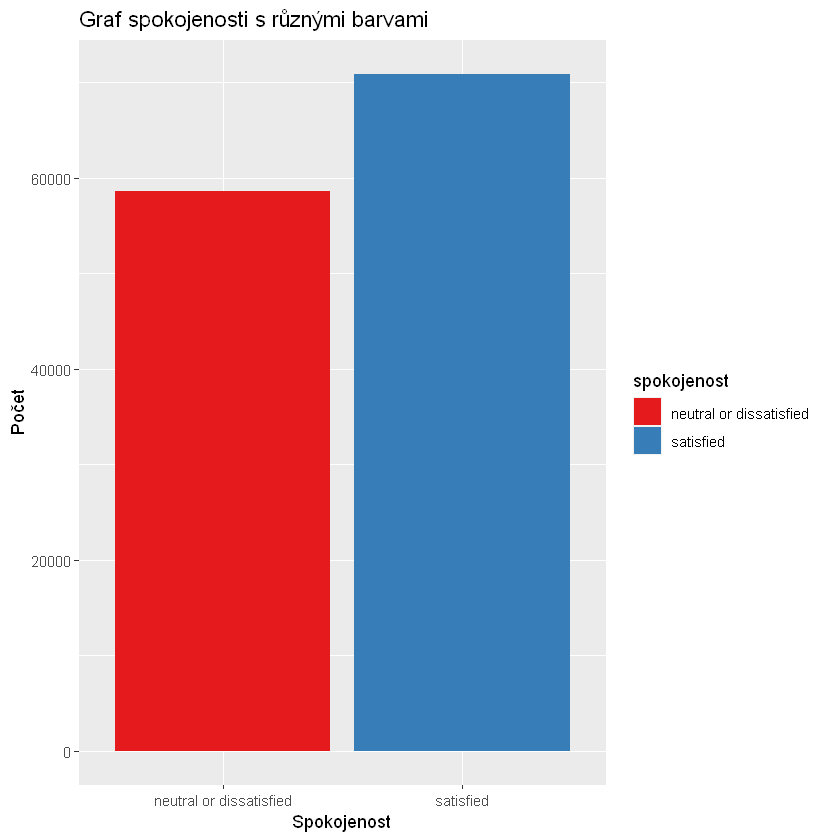

In [33]:
library(ggplot2)
library(RColorBrewer)

# Vytvoření palety barev pro jednotlivé hodnoty spokojenosti
palette <- brewer.pal(length(unique(f$spokojenost)), "Set1")

# Vykreslení spokojenosti pomocí ggplotu s různými barvami
ggplot(f, aes(x = spokojenost, fill = spokojenost)) +
  geom_bar() +
  scale_fill_manual(values = palette) +
  labs(x = "Spokojenost", y = "Počet") +
  ggtitle("Graf spokojenosti s různými barvami")

In [35]:
colnames(f)

[1] "id"                          "spokojenost"                
 [3] "pohlavi"                     "typ_zakaznika"              
 [5] "vek"                         "typ_cestovani"              
 [7] "trida"                       "vzdalenost_letu"            
 [9] "komfort_sedadla"             "cas_odlet_prilet_pohodlnost"
[11] "jidlo_a_piti"                "poloha_gate"                
[13] "wifi_na_palube"              "zabava_na_palube"           
[15] "online_podpora"              "snadnost_online_rezervace"  
[17] "sluzby_na_palube"            "sluzby_pro_prostor_na_nohy" 
[19] "manipulace_s_batohem"        "checkin_sluzba"             
[21] "cistota"                     "online_nastup"              
[23] "zpozdeni_odletu_v_minutach"  "zpozdeni_priletu_v_minutach"

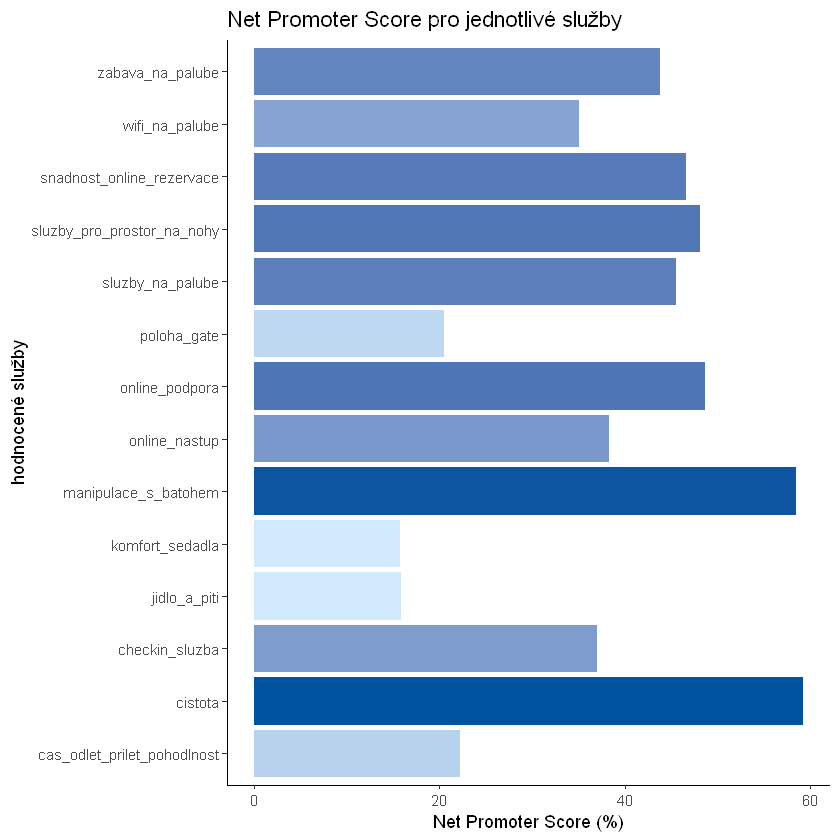

In [55]:
library(tidyverse)

# Vezmeme všechny sloupce s hodnocením 0 až 5 a převedeme na faktory
f <- f %>%
  mutate_at(vars(komfort_sedadla:online_nastup), factor, levels = 0:5)

# Definujeme si kritiky, pasivní zákazníky a promotéry.
# Čím vyšší hodnocení, tím lepší
# Taktéž si zadefinujeme výpočet Net promoter score 
calculate_nps <- function(x) {
  promoters <- sum(x %in% c(4, 5))
  detractors <- sum(x %in% c(0, 1))
  nps <- (promoters - detractors) / length(x) * 100
  return(nps)
}

nps_data <- f %>%
  summarize(across(komfort_sedadla:online_nastup, calculate_nps)) %>%
  pivot_longer(everything(), names_to = "sloupec", values_to = "nps")

# Vykreslení grafů
ggplot(nps_data, aes(x = sloupec, y = nps, fill = nps)) +
  geom_bar(stat = "identity") +
  labs(x = "hodnocené služby", y = "Net Promoter Score (%)") +
  ggtitle("Net Promoter Score pro jednotlivé služby") +
  theme_classic() +
  theme(legend.position = "none") +
  coord_flip() +
  scale_fill_gradient(low = "#D1EAFB", high = "#00539F")

komfort_sedadla,cas_odlet_prilet_pohodlnost,jidlo_a_piti,poloha_gate,wifi_na_palube,zabava_na_palube,online_podpora,snadnost_online_rezervace,sluzby_na_palube,sluzby_pro_prostor_na_nohy,manipulace_s_batohem,checkin_sluzba,cistota,online_nastup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,3,3,5,3,4,4,1,4,6,4,3
1,1,1,4,1,3,3,4,5,5,5,3,4,3
1,1,1,4,3,1,3,3,4,4,5,5,5,3
1,1,1,4,4,5,4,2,2,1,2,5,2,4
1,1,1,4,5,4,5,3,3,1,3,5,3,6
1,1,1,4,3,1,3,3,6,5,6,6,5,3
1,1,1,4,3,6,6,6,6,1,6,6,6,4
1,1,1,4,3,1,3,3,4,4,5,6,5,3
1,1,1,4,6,4,6,5,5,1,2,6,5,5


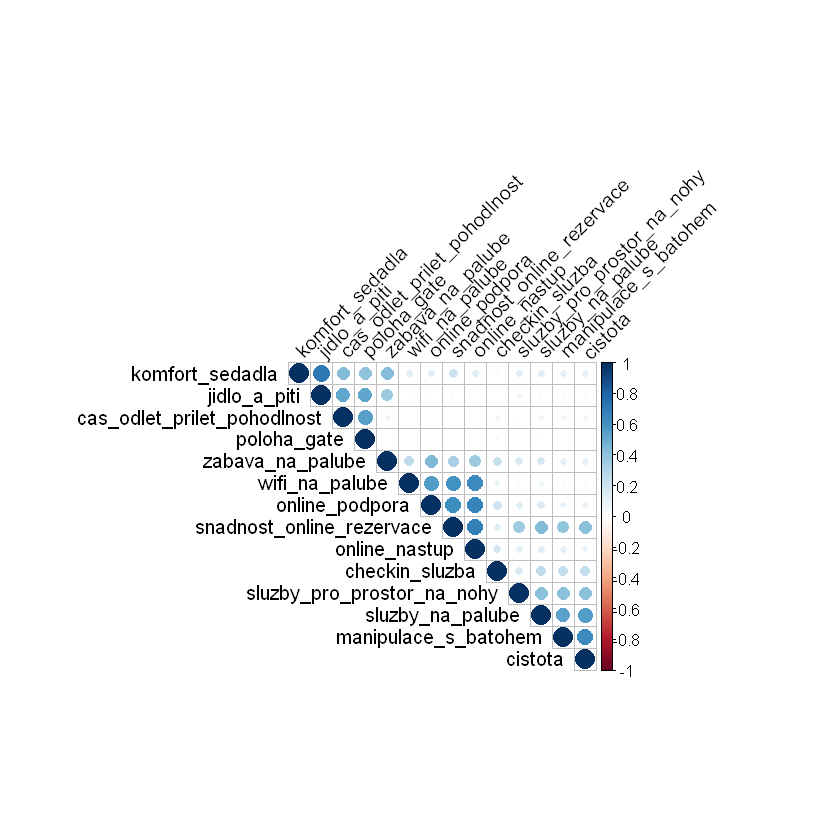

In [97]:
library(tidyverse)
library(corrplot)

# Převod faktorů na numerický formát
f_numeric <- f %>%
  mutate(across(komfort_sedadla:online_nastup, as.numeric))

# Výběr sloupců "komfort_sedadla" až "online_nastup"
selected_cols <- f_numeric %>%
  select(komfort_sedadla:online_nastup)

selected_cols

# Výpočet matice korelace
cor_matrix <- cor(selected_cols, method = "pearson")

# Vykreslení korelační matice
corrplot(cor_matrix, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

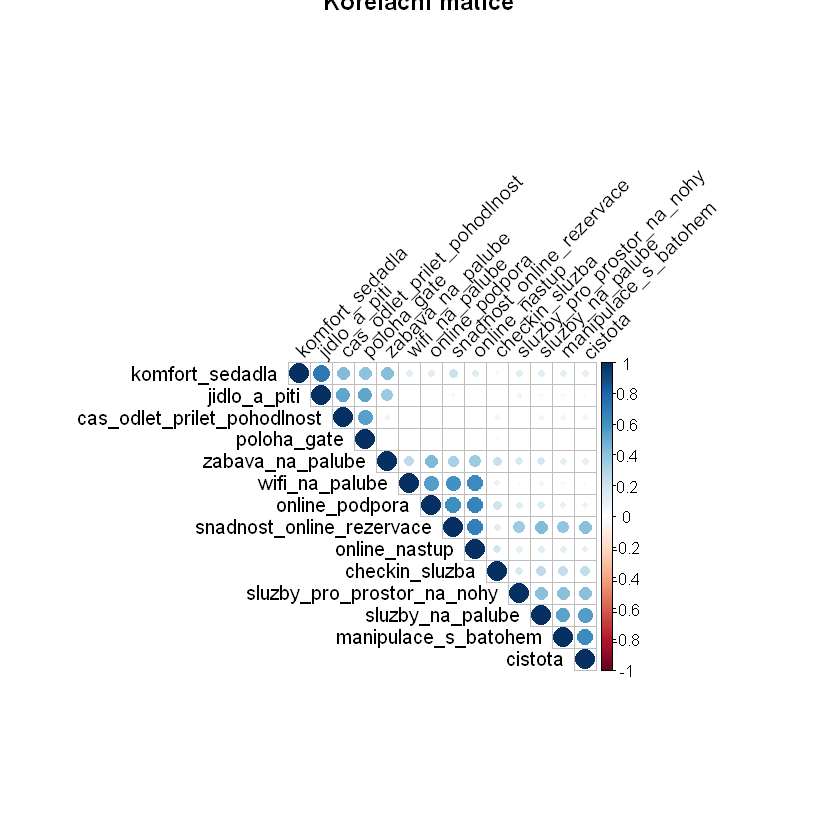

In [109]:
library(tidyverse)
library(corrplot)

# Převod faktorů na numerický formát
f_numeric <- f %>%
  mutate(across(vzdalenost_letu:zpozdeni_priletu_v_minutach, as.numeric))

# Výběr sloupců "komfort_sedadla" až "online_nastup"
selected_cols <- f_numeric %>%
  select(komfort_sedadla:online_nastup)

# Výpočet matice korelace
cor_matrix <- cor(selected_cols, method = "pearson")

# Vykreslení korelační matice
corrplot(cor_matrix, main= "Korelační matice", type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

In [104]:
colnames(f)

[1] "id"                          "spokojenost"                
 [3] "pohlavi"                     "typ_zakaznika"              
 [5] "vek"                         "typ_cestovani"              
 [7] "trida"                       "vzdalenost_letu"            
 [9] "komfort_sedadla"             "cas_odlet_prilet_pohodlnost"
[11] "jidlo_a_piti"                "poloha_gate"                
[13] "wifi_na_palube"              "zabava_na_palube"           
[15] "online_podpora"              "snadnost_online_rezervace"  
[17] "sluzby_na_palube"            "sluzby_pro_prostor_na_nohy" 
[19] "manipulace_s_batohem"        "checkin_sluzba"             
[21] "cistota"                     "online_nastup"              
[23] "zpozdeni_odletu_v_minutach"  "zpozdeni_priletu_v_minutach"

In [119]:
# Provedení lineární regrese
lm_model <- lm(spokojenost ~ pohlavi + vzdalenost_letu +typ_cestovani+trida+vzdalenost_letu+
               komfort_sedadla+cas_odlet_prilet_pohodlnost+jidlo_a_piti+poloha_gate+wifi_na_palube+zabava_na_palube+
               online_podpora+snadnost_online_rezervace+sluzby_na_palube+sluzby_pro_prostor_na_nohy+
               manipulace_s_batohem+checkin_sluzba+cistota+online_nastup+zpozdeni_odletu_v_minutach+
               zpozdeni_priletu_v_minutach, data = f)

# Výpis výsledků regrese
summary(lm_model)


Call:
lm(formula = spokojenost ~ pohlavi + vzdalenost_letu + typ_cestovani + 
    trida + vzdalenost_letu + komfort_sedadla + cas_odlet_prilet_pohodlnost + 
    jidlo_a_piti + poloha_gate + wifi_na_palube + zabava_na_palube + 
    online_podpora + snadnost_online_rezervace + sluzby_na_palube + 
    sluzby_pro_prostor_na_nohy + manipulace_s_batohem + checkin_sluzba + 
    cistota + online_nastup + zpozdeni_odletu_v_minutach + zpozdeni_priletu_v_minutach, 
    data = f)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.58887 -0.33861  0.00629  0.33488  2.64927 

Coefficients: (3 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.285e+00  7.959e-01   1.615 0.106415    
pohlaviMale                  -1.637e-01  3.503e-03 -46.740  < 2e-16 ***
vzdalenost_letu              -9.256e-06  1.711e-06  -5.411 6.27e-08 ***
typ_cestovaniPersonal Travel -7.204e-03  4.733e-03  -1.522 0.127979    
tridaE

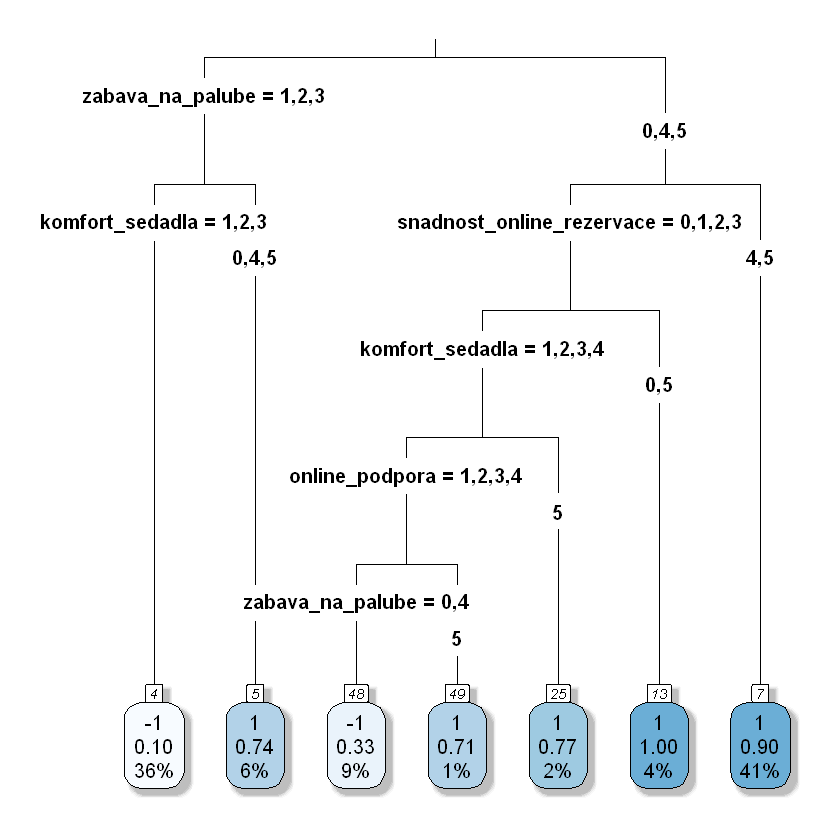

In [124]:
library(rpart)
library(rpart.plot)

tree_model <- rpart(spokojenost ~ ., data = f, method = "class")


# Vykreslení rozhodovacího stromu pomocí rpart.plot
rpart.plot(tree_model, box.palette = "Blues", shadow.col = "gray", nn = TRUE, type = 3)

In [125]:
f$cluster <- kmeans_model$cluster

# Výběr proměnných pro vizualizaci
vars <- c(f$komfort_sedadla, f$jidlo_a_piti)

# Vytvoření grafu rozptylu s přiřazením shluků k barevným skupinám
ggplot(f, aes(x = komfort_sedadla, y = jidlo_a_piti, color = factor(cluster))) +
  geom_point() +
  labs(x = "Komfort sedadla", y = "Jídlo a pití", color = "Shluk") +
  theme_minimal()

ERROR: Error in eval(expr, envir, enclos): object 'kmeans_model' not found
